In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Point:
    def __init__(self,cordinates,name):
        self.x = cordinates[0]
        self.y = cordinates[1]
        self.name = name
        
    def __repr__(self):
        return (f"({self.x}, {self.y})" )
    
    def __str__(self):
        return (self.name)
    
    def __sub__(self, other):
        if isinstance(other, Point):
            return Point((self.x - other.x, self.y - other.y), f"{self.name}-{other.name}")
        else:
            raise TypeError("Unsupported operand type for -: Point and {}".format(type(other).__name__))

    
        

In [3]:

def cross_point(p0,p1,p2):# tomamos p0 como el punto de origen, p1 como el punto que queremos categorizar, respecto a p2
                       
    prod1 = (p1.x - p0.x) * (p2.y - p0.y)
    prod2 = (p1.y - p0.y) * (p2.x - p0.x)
    res = prod1 - prod2
    if res < 0 : return 1   #print("p1 esta en sentido horario respecto a p2 - p0")
    elif res > 0 :return -1 #print ("p1 esta en sentido anti-horario respecto a p2 - p0")
    else: return 0          #print(" los segmentos son colineales")

In [4]:
def visualization(points):
    fig, ax = plt.subplots(figsize=(3,3))
    colors = ['blue','red','green','orange','purple','cyan','brown']
    
    for i in range(0, len(points)-1,2):
        plt.arrow(points[i].x, points[i].y, points[i+1].x - points[i].x, points[i+1].y - points[i].y, head_width =0.05, head_length=0.05,
                 color=colors[i], label= f"{points[i+1]}-{points[i]}")
        
        
    plt.legend()
    plt.show()

In [5]:
# def visualization(points):
#     x = [coor.x for coor in points]
#     y = [coor.y for coor in points]
#     colors = ['blue','red','green','orange','purple','cyan','brown']
#     fig, ax = plt.subplots()
    
    
#     # Plot the lines segments
#     for i in range(len(x) - 1):
#         plt.plot([x[i], x[i+1]], [y[i], y[i+1]], marker='o',linestyle='-',color=colors[i], label=f"{}")
    
   
#     plt.show()

### Primera pregunta 
#### Dado dos segmentos de linea que parten desde el origen definir si P1 esta en sentido horario o antihorario respecto a P2

In [6]:
p0 = (0,0)
p1 = (2,1)
p2 = (0,4)

P0 = Point(p0,"P0")
P1 = Point(p1,"P1")
P2 = Point(p2,"P2")
print(P0)
P0

P0


(0, 0)

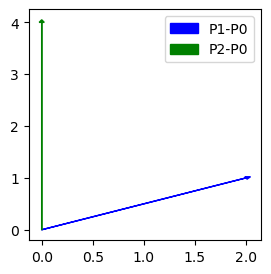

In [7]:

cross_point(P0,P1,P2)
points = [P0,P1,P0,P2]
visualization(points)

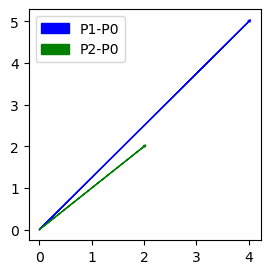

In [8]:
p0 = (0,0)
p1 = (4,5)
p2 = (2,2)

P0 = Point(p0,"P0")
P1 = Point(p1,"P1")
P2 = Point(p2,"P2")


cross_point(P0,P1,P2)
points = [P0,P1,P0,P2]
visualization(points)

### Segunda pregunta 
#### si los vectores no comparten un punto en comun 

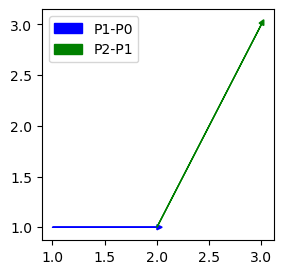

In [9]:
p0 = (1,1)
p1 = (2,1)
p2 = (3,3)

P0 = Point(p0,"P0")
P1 = Point(p1,"P1")
P2 = Point(p2,"P2")


cross_point(P0,P1,P2)
points = [P0,P1,P1,P2]
visualization(points) 

### Tercera pregunta 
#### como saber si dos segmentos de linea se cruzan 

In [10]:
def on_segment(Pi,Pp,Pr): # Pinicial, Pproncipal, Preferente(respecto a)
    if min(Pi.x,Pp.x) <= Pr.x and Pr.x <= max(Pi.x,Pp.x) and \
    min(Pi.y,Pp.y) <= Pr.y and Pr.y <= max(Pi.y,Pp.y):
        return True
    else: return False
    
def intesect_segments(P0,P1,P2,P3):
    d0 = cross_point(P2,P0,P3)
    d1 = cross_point(P2,P1,P3)
    d2 = cross_point(P0,P2,P1)
    d3 = cross_point(P0,P3,P1)
    
    if d0 * d1 < 0 and d2 * d3 < 0:
        
        return True
    elif d0 == 0 and on_segment(P2,P0,P3): return True
    elif d1 == 0 and on_segment(P2,P1,P3): return True
    elif d2 == 0 and on_segment(P0,P2,P1): return True
    elif d3 == 0 and on_segment(P0,P3,P1): return True
    else:return False


        

#### Caso "fácil"


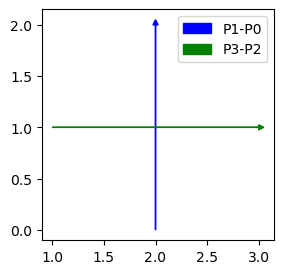

True

In [11]:
P0 = Point((2,0),'P0')
P1 = Point((2,2),'P1')
P2 = Point((1,1),'P2')
P3 = Point((3,1),'P3')
points = [P0,P1,P2,P3]
visualization(points)
intesect_segments(P0,P1,P2,P3)

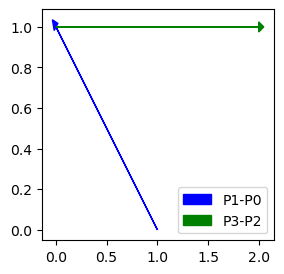

True

In [12]:
P0 = Point((1,0),'P0')
P1 = Point((0,1),'P1')
P2 = Point((0,1),'P2')
P3 = Point((2,1),'P3')
points = [P0,P1,P2,P3]
visualization(points)
intesect_segments(P0,P1,P2,P3)

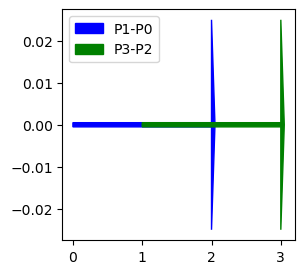

True

In [16]:
P0 = Point((0,0),'P0')
P1 = Point((2,0),'P1')
P2 = Point((1,0),'P2')
P3 = Point((3,0),'P3')
points = [P0,P1,P2,P3]
visualization(points)
intesect_segments(P0,P1,P2,P3)

In [29]:
def found_point(P0, P1, P2, P3):
    if intesect_segments(P0, P1, P2, P3):
        X = np.array([[P0.x - P1.x, P3.x - P2.x], [P0.y - P1.y, P3.y - P2.y]])
        y = np.array([P3.x - P1.x, P3.y - P1.y])
        Xinv = np.linalg(X)
        res = np.dot(Xinv, y)
        alpha = res[0]
        beta = res[1]
        Px_R = alpha * P0.x + (1 - alpha) * P1.x
        Py_R = alpha * P0.y + (1 - alpha) * P1.y
        Pres = Point((Px_R, Py_R), 'P_int')
        return Pres
    else:
        return False
    

In [27]:
P0 = Point((2,0),'P0')
P1 = Point((2,2),'P1')
P2 = Point((1,1),'P2')
P3 = Point((3,1),'P3')
points = [P0,P1,P2,P3]
found_point(P0, P1, P2, P3)

array([[ 0,  2],
       [-2,  0]])

TypeError: unsupported operand type(s) for *: 'Point' and 'float'

## Tarea revisar el caso en el que p0 p1 p2 sean colineales pero p2 hiciera un giro de 180 grados 

In [14]:
p0 = (1,1)
p1 = (3,1)
p2 = (2,1)

P0 = Point(p0,"P0")
P1 = Point(p1,"P1")
P2 = Point(p2,"P2")


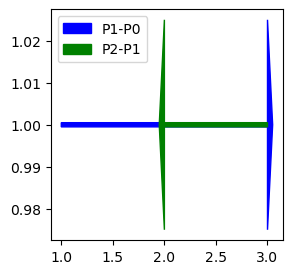

In [15]:

cross_point(P0,P1,P2)
points = [P0,P1,P1,P2]
visualization(points) 